In [1]:
__author__ = "Aida Hallaci" 
__version__ = "INM434/IN3045 City, University of London, Spring 2023"

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from nltk.tokenize import ToktokTokenizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.feature_selection import SelectKBest, chi2
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, Reshape
import tensorflow as tf
import joblib
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
df=pd.read_csv('/content/drive/MyDrive/NLP/dataset.csv')
print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
def map_sentiment_to_label(sentiment):
    if sentiment == 'positive':
        return 0
    elif sentiment == 'negative':
        return 1
    else:
        return None
df['sentiment'] = df['sentiment'].apply(map_sentiment_to_label)


In [ ]:
label_counts = df['sentiment'].value_counts()
print(label_counts)

In [9]:
print("Number of samples:", len(df))
print("Class distribution:\n", df['sentiment'].value_counts())

Number of samples: 50000
Class distribution:
 0    25000
1    25000
Name: sentiment, dtype: int64


In [ ]:
df['Review Length'] = df['review'].apply(lambda x: len(x.split()))
print("Text length statistics:\n", df['Review Length'].describe())

Text length statistics:
 count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: Review Length, dtype: float64


In [ ]:
print("Missing data:\n", df.isnull().sum())

Missing data:
 review           0
sentiment        0
Review Length    0
dtype: int64


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), np.asarray(X.sum(axis=0)).ravel()))
word_freq_sorted = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

In [10]:
print("Total unique words:", len(word_freq))
print("Top 10 most common words:", list(word_freq_sorted.keys())[:10])
print("Top 10 least common words:", list(word_freq_sorted.keys())[-10:])

Total unique words: 101895
Top 10 most common words: ['the', 'and', 'of', 'to', 'is', 'br', 'it', 'in', 'this', 'that']
Top 10 least common words: ['ünel', 'ünfaithful', 'üvegtigris', 'üzümcü', 'ýs', 'þorleifsson', 'þór', 'żmijewski', 'יגאל', 'כרמון']


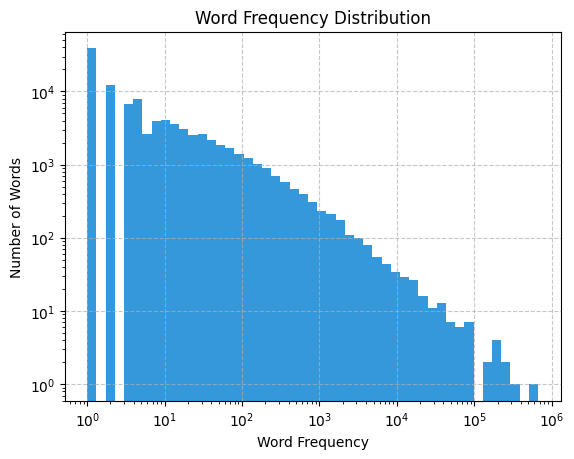

In [11]:
word_counts = np.array(list(word_freq.values()))
bins = np.logspace(np.log10(min(word_counts)), np.log10(max(word_counts)), 50)
plt.hist(word_counts, bins=bins, color='#3498db', log=True)
plt.xscale('log')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Word Frequency Distribution')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


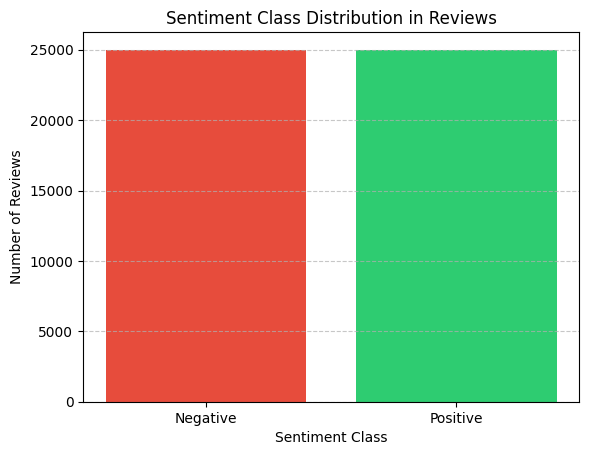

In [ ]:
# Sentiment class distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_labels = ['Negative', 'Positive']
sentiment_colors = ['#e74c3c', '#2ecc71']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=sentiment_colors)
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Class Distribution in Reviews')
plt.xticks(sentiment_counts.index, sentiment_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 7. N-gram analysis
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigram = bigram_vectorizer.fit_transform(df['review'])
bigram_freq = dict(zip(bigram_vectorizer.get_feature_names_out(), np.asarray(X_bigram.sum(axis=0)).ravel()))
bigram_freq_sorted = dict(sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True))

print("Top 10 most common bigrams:", list(bigram_freq_sorted.keys())[:10])

Top 10 most common bigrams: ['br br', 'of the', 'in the', 'this movie', 'the film', 'and the', 'the movie', 'to the', 'to be', 'this film']


# Text Preprocessing


Removing punctuation and special characters


In [7]:
# Define the pos_tokenizer() function
def pos_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return [word + '_' + tag for (word, tag) in pos_tags]
df['review'] = df['review'].apply(pos_tokenizer)
print(df.head(10))

                                              review  sentiment
0  [One_CD, of_IN, the_DT, other_JJ, reviewers_NN...          0
1  [A_DT, wonderful_JJ, little_JJ, production_NN,...          0
2  [I_PRP, thought_VBD, this_DT, was_VBD, a_DT, w...          0
3  [Basically_NNP, there_EX, 's_VBZ, a_DT, family...          1
4  [Petter_NNP, Mattei_NNP, 's_POS, ``_``, Love_N...          0
5  [Probably_RB, my_PRP$, all-time_JJ, favorite_J...          0
6  [I_PRP, sure_RB, would_MD, like_VB, to_TO, see...          0
7  [This_DT, show_NN, was_VBD, an_DT, amazing_JJ,...          1
8  [Encouraged_VBN, by_IN, the_DT, positive_JJ, c...          1
9  [If_IN, you_PRP, like_VBP, original_JJ, gut_NN...          0


In [8]:
# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'just', 'was', 'if', 'most', "couldn't", 'all', "you're", 'under', 'by', 'has', 'each', 'further', "mustn't", 'with', 'ourselves', 'theirs', 'a', 'few', 'other', "wouldn't", 'some', 'such', "haven't", 'on', 'against', 'before', 'am', 'how', "didn't", 'their', 'should', 'which', 'until', 'yourselves', 'at', 'into', "don't", 'as', 'what', 'during', 'so', 'o', 'my', 'because', "she's", 'here', 'and', 'mightn', 'haven', 'have', 'above', 'ma', 'no', 'our', 'about', 'why', 'did', 'through', 'than', 't', 'same', 'shan', 'its', 'her', 'out', 'when', "hasn't", 'didn', "isn't", "wasn't", 'then', 'can', 'between', 'will', 'hasn', 'who', 'only', 'more', 'myself', 'them', 'me', "aren't", 'it', 'ours', "you've", 's', "hadn't", 'doing', 'won', "you'll", 'been', 'from', 'up', 'once', 'were', 'does', "shan't", 'you', 'm', "you'd", 'being', 'these', 'below', 'mustn', 'him', "needn't", 'yourself', 'while', "mightn't", 'but', 'do', 'or', 'off', 'i', 'now', 'wasn', 'again', 'she', 're', 'the', 'isn', 'wou

In [9]:
def remove_stopwords(text):
    if isinstance(text, list):
        text = ' '.join(text)
        words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    text_without_stopwords = ' '.join(words)
    return text_without_stopwords

df['review'] = df['review'].apply(remove_stopwords)


In [10]:

# Define function to remove HTML strips
def remove_html(text):
    html_parser = BeautifulSoup(text, "html.parser")
    return html_parser.get_text()

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\d+', '', text)  # remove digits
        text = re.sub('<br\s*/>', ' ', text)
        text = re.sub('<[^<]+?>', '', text)

        return text
    else:
        return ""
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(remove_html)
df['review'] = df['review'].apply(remove_square_brackets)

In [11]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['review']=df['review'].apply(remove_special_characters)

In [12]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
df['review']=df['review'].apply(simple_stemmer)

In [13]:
def simple_lemmatizer(text):
    lemmatizer = nltk.WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text
df['review'] = df['review'].apply(simple_lemmatizer)

## Feature Extraction

In [14]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(df['review'])
X_seq = tokenizer.texts_to_sequences(df['review'])
X_padded = pad_sequences(X_seq, maxlen=100)


In [15]:
df['padded_review'] = list(X_padded)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [18]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, lowercase=False)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()


In [28]:
np.save('X_test_tfidf.npy', X_test_tfidf)

In [38]:
np.save('y_test.npy', y_test)

In [20]:
bow_vectorizer = CountVectorizer(max_features=5000, lowercase=False)
X_train_bow = bow_vectorizer.fit_transform(X_train).toarray()
X_test_bow = bow_vectorizer.transform(X_test).toarray()



In [29]:
np.save('X_test_bow.npy', X_test_bow)

In [21]:
vocab_size = 5000

X_test = [str(review) for review in X_test]
X_test = [str(review) for review in X_test]
X_train_str = [str(text) for text in X_train]
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_str)
X_train_seq = tokenizer.texts_to_sequences(X_train_str)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_len = 100
trunc_type = 'post'
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, truncating=trunc_type)

# ***BASELINE MODEL,LR***

LR+TFIDF

In [24]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5039
           1       0.89      0.88      0.89      4961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[4523  516]
 [ 600 4361]]


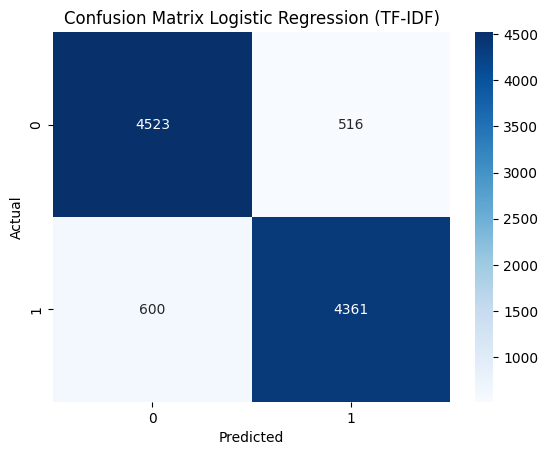

In [23]:
y_pred_logreg = logreg_model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression (TF-IDF)')
plt.show()

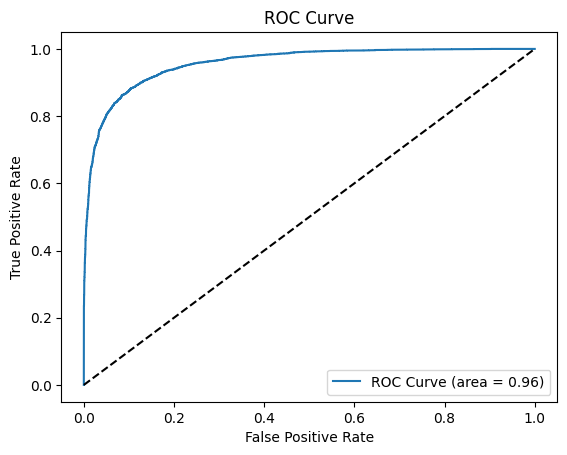

In [24]:
y_pred_logreg_prob = logreg_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob)
auc = roc_auc_score(y_test, y_pred_logreg_prob)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

LR+BoW

In [25]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_bow, y_train)
y_pred_logreg = logreg_model.predict(X_test_bow)
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5039
           1       0.89      0.88      0.88      4961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[4494  545]
 [ 604 4357]]


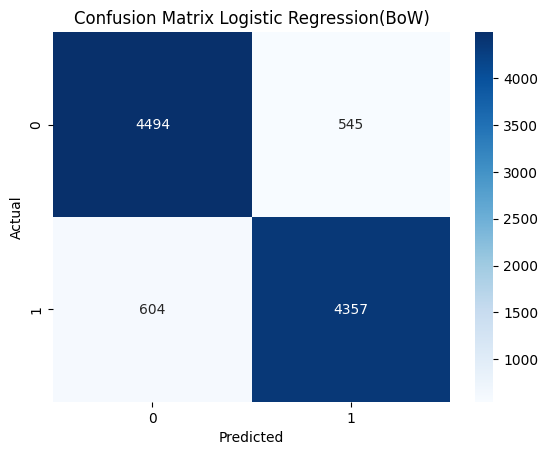

In [26]:
y_pred_logreg = logreg_model.predict(X_test_bow)
cm = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression(BoW)')
plt.show()


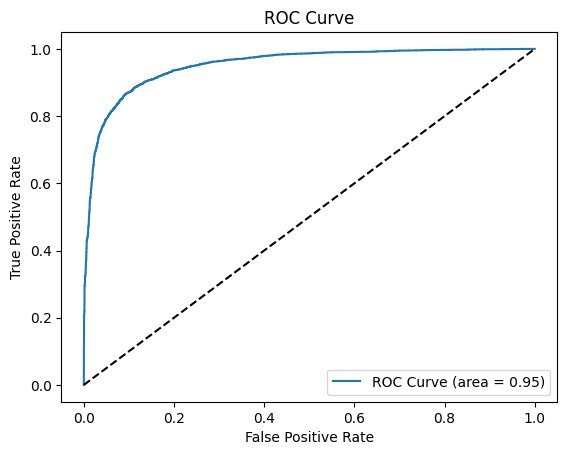

In [27]:
y_pred_logreg_prob = logreg_model.predict_proba(X_test_bow)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob)
auc = roc_auc_score(y_test, y_pred_logreg_prob)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## ***LSTM,ALL MODELS***

In [ ]:
vocab_size = 5000
embedding_dim = 100
hidden_dim = 128
num_epochs = 4
batch_size = 16
output_dim = 1

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(hidden_dim),
    tf.keras.layers.Dense(output_dim, activation='sigmoid')
])
batch_size=16
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_lstm = model.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)


In [30]:

loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print('LSTM model accuracy on test set: {:.2f}%'.format(accuracy * 100))

LSTM model accuracy on test set: 77.63%


313/313 [==============================] - 1s 3ms/step


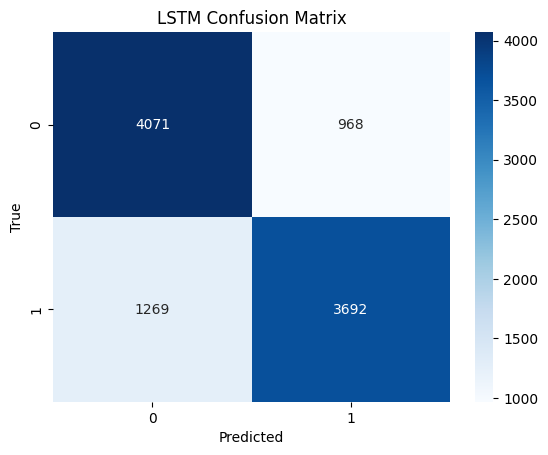

[[4071  968]
 [1269 3692]]


In [31]:
y_pred_lstm = model.predict(X_test_padded)
y_pred_lstm = [1 if p >= 0.5 else 0 for p in y_pred_lstm]
lstm_score = accuracy_score(y_test, y_pred_lstm)
lstm_cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()
print(lstm_cm)

**LSTM+TF-IDF**

In [32]:
model_LSTM_tfidf = Sequential([
    Reshape((1, vocab_size)),
    LSTM(hidden_dim),
    Dense(output_dim, activation='sigmoid')
])




In [33]:
model_LSTM_tfidf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
history_lstm_tfidf = model_LSTM_tfidf.fit(X_train_tfidf, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
loss, accuracy = model_LSTM_tfidf.evaluate(X_test_tfidf, y_test, verbose=0)
print('LSTM model accuracy on test set: {:.2f}%'.format(accuracy * 100))

Epoch 1/4
2250/2250 [==============================] - 10s 4ms/step - loss: 0.3184 - accuracy: 0.8687 - val_loss: 0.2703 - val_accuracy: 0.8857
Epoch 2/4
2250/2250 [==============================] - 8s 4ms/step - loss: 0.2342 - accuracy: 0.9042 - val_loss: 0.2807 - val_accuracy: 0.8830
Epoch 3/4
2250/2250 [==============================] - 8s 3ms/step - loss: 0.2175 - accuracy: 0.9116 - val_loss: 0.2876 - val_accuracy: 0.8810
Epoch 4/4
2250/2250 [==============================] - 8s 4ms/step - loss: 0.2040 - accuracy: 0.9159 - val_loss: 0.2970 - val_accuracy: 0.8810
LSTM model accuracy on test set: 87.74%


313/313 [==============================] - 1s 2ms/step


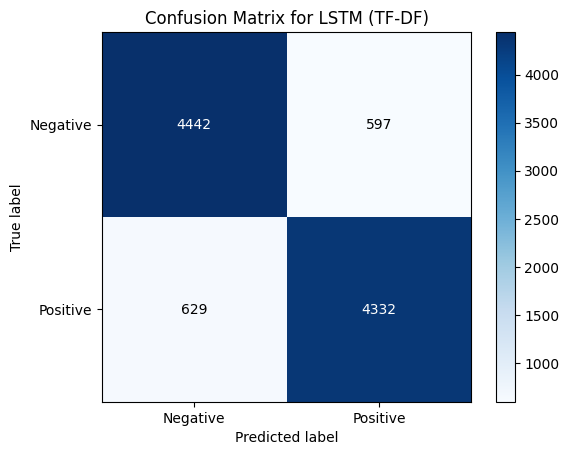

In [35]:
y_pred_prob = model_LSTM_tfidf.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
text_colors = ['black', 'white']
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color=text_colors[int(cm[i, j] > thresh)])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM (TF-DF)')
plt.show()

**LSTM+BoW**

In [36]:
history_lstm_tfidf = model_LSTM_tfidf.fit(X_train_bow, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
loss, accuracy = model_LSTM_tfidf.evaluate(X_test_bow, y_test, verbose=0)
print('LSTM model accuracy on test set: {:.2f}%'.format(accuracy * 100))

Epoch 1/4
2250/2250 [==============================] - 10s 4ms/step - loss: 0.2403 - accuracy: 0.9064 - val_loss: 0.3274 - val_accuracy: 0.8758
Epoch 2/4
2250/2250 [==============================] - 8s 4ms/step - loss: 0.1265 - accuracy: 0.9498 - val_loss: 0.3766 - val_accuracy: 0.8737
Epoch 3/4
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0660 - accuracy: 0.9784 - val_loss: 0.4439 - val_accuracy: 0.8742
Epoch 4/4
2250/2250 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9937 - val_loss: 0.5527 - val_accuracy: 0.8755
LSTM model accuracy on test set: 87.53%


313/313 [==============================] - 1s 2ms/step


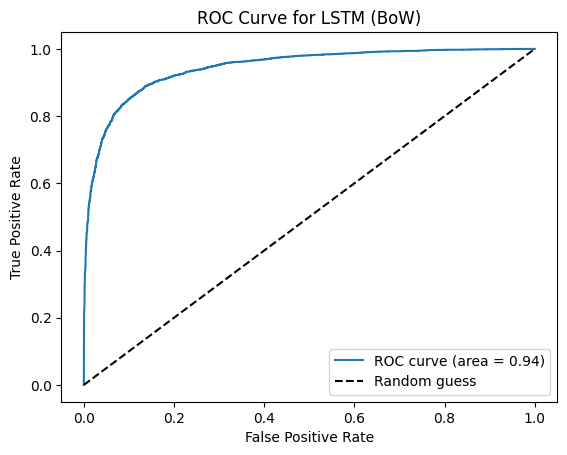

In [37]:
y_pred_prob = model_LSTM_tfidf.predict(X_test_bow)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM (BoW)')
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


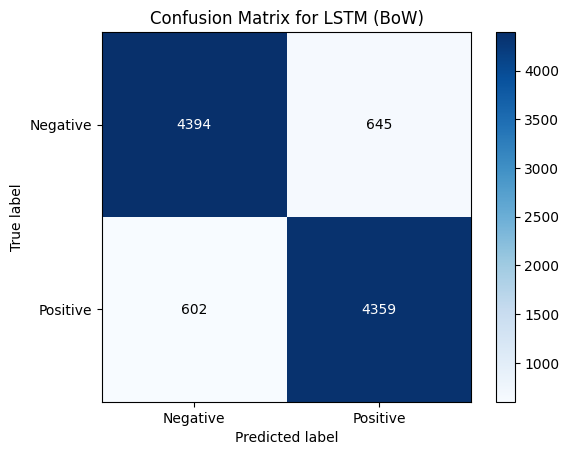

In [39]:
y_pred_prob = model_LSTM_tfidf.predict(X_test_bow)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
text_colors = ['black', 'white']
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color=text_colors[int(cm[i, j] > thresh)])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM (BoW)')
plt.show()

# RNN,ALL MODELS

In [30]:
vocab_size = 5000
embedding_dim = 100
hidden_dim = 128
output_dim = 1
num_epochs = 4
batch_size = 16
model_RNN = Sequential([
    Embedding(vocab_size, embedding_dim),
    SimpleRNN(hidden_dim),
    Dense(output_dim, activation='sigmoid')
])
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history_rnn = model_RNN.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
loss, accuracy = model_RNN.evaluate(X_test_padded, y_test, verbose=0)
print('RNN model accuracy on test set: {:.2f}%'.format(accuracy * 100))

Epoch 1/4
2250/2250 [==============================] - 157s 67ms/step - loss: 0.6959 - accuracy: 0.5186 - val_loss: 0.6921 - val_accuracy: 0.5197
Epoch 2/4
2250/2250 [==============================] - 139s 62ms/step - loss: 0.6818 - accuracy: 0.5617 - val_loss: 0.6864 - val_accuracy: 0.5497
Epoch 3/4
2250/2250 [==============================] - 136s 61ms/step - loss: 0.6599 - accuracy: 0.6053 - val_loss: 0.6858 - val_accuracy: 0.5460
Epoch 4/4
2250/2250 [==============================] - 134s 59ms/step - loss: 0.6448 - accuracy: 0.6271 - val_loss: 0.6640 - val_accuracy: 0.6215
RNN model accuracy on test set: 63.26%


***RNN+TF-IDF***

In [32]:
model_RNN_tfidf = Sequential([
    Reshape((1, vocab_size), input_shape=(vocab_size,)),
    SimpleRNN(hidden_dim),
    Dense(output_dim, activation='sigmoid')
])
model_RNN_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history_rnn = model_RNN_tfidf.fit(X_train_tfidf, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
loss, accuracy = model_RNN_tfidf.evaluate(X_test_tfidf, y_test, verbose=0)
print('RNN model accuracy on test set: {:.2f}%'.format(accuracy * 100))

Epoch 1/4
2250/2250 [==============================] - 9s 3ms/step - loss: 0.3169 - accuracy: 0.8671 - val_loss: 0.2702 - val_accuracy: 0.8915
Epoch 2/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.2423 - accuracy: 0.9029 - val_loss: 0.2788 - val_accuracy: 0.8857
Epoch 3/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.2278 - accuracy: 0.9099 - val_loss: 0.2897 - val_accuracy: 0.8770
Epoch 4/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.2189 - accuracy: 0.9121 - val_loss: 0.2956 - val_accuracy: 0.8780
RNN model accuracy on test set: 87.43%


313/313 [==============================] - 1s 2ms/step


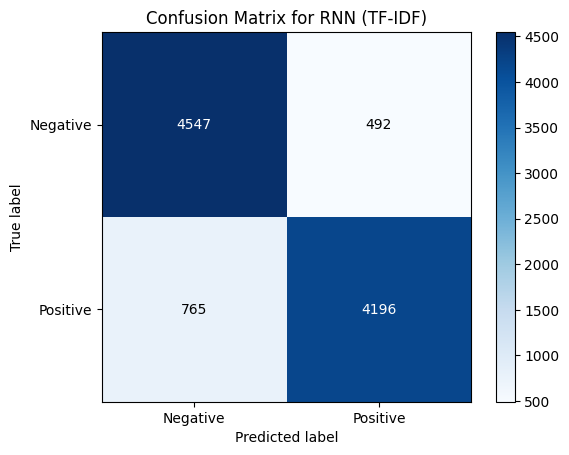

In [34]:
y_pred_prob = model_RNN_tfidf.predict(X_test_tfidf)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
text_colors = ['black', 'white']
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color=text_colors[int(cm[i, j] > thresh)])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RNN (TF-IDF)')
plt.show()

313/313 [==============================] - 1s 2ms/step


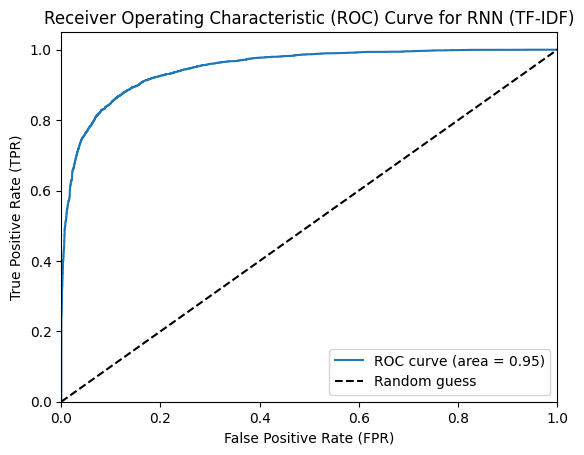

In [35]:
y_pred_prob = model_RNN_tfidf.predict(X_test_tfidf)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for RNN (TF-IDF)')
plt.legend(loc='lower right')
plt.show()


***RNN+BoW***

In [36]:
history_rnn = model_RNN_tfidf.fit(X_train_bow, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
loss, accuracy = model_RNN_tfidf.evaluate(X_test_bow, y_test, verbose=0)
print('RNN model accuracy on test set: {:.2f}%'.format(accuracy * 100))

Epoch 1/4
2250/2250 [==============================] - 8s 3ms/step - loss: 0.2387 - accuracy: 0.9049 - val_loss: 0.2912 - val_accuracy: 0.8832
Epoch 2/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.1948 - accuracy: 0.9234 - val_loss: 0.2997 - val_accuracy: 0.8790
Epoch 3/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.1620 - accuracy: 0.9367 - val_loss: 0.3167 - val_accuracy: 0.8785
Epoch 4/4
2250/2250 [==============================] - 7s 3ms/step - loss: 0.1228 - accuracy: 0.9548 - val_loss: 0.3690 - val_accuracy: 0.8788
RNN model accuracy on test set: 87.70%


313/313 [==============================] - 1s 2ms/step


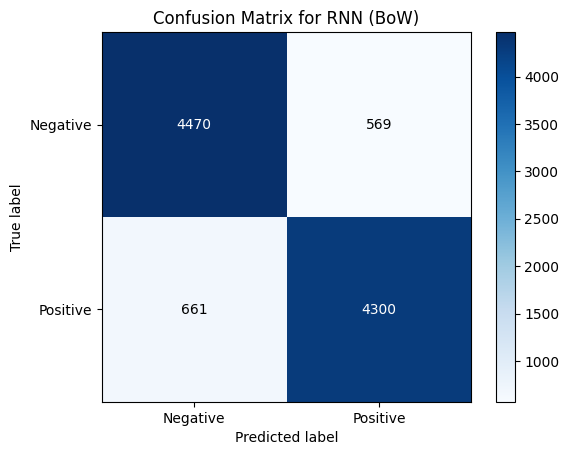

In [37]:
y_pred_prob = model_RNN_tfidf.predict(X_test_bow)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
text_colors = ['black', 'white']
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color=text_colors[int(cm[i, j] > thresh)])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RNN (BoW)')
plt.show()

313/313 [==============================] - 1s 2ms/step


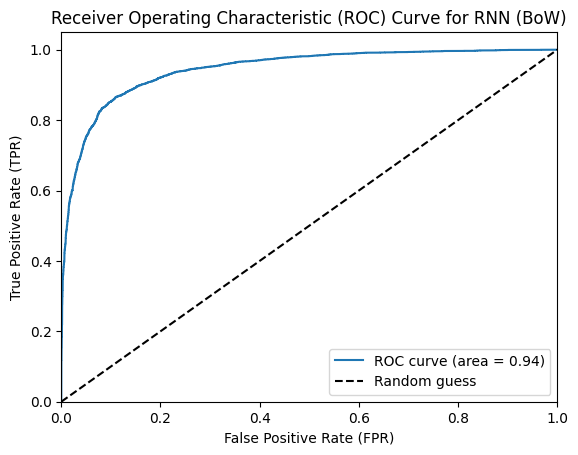

In [38]:
y_pred_prob = model_RNN_tfidf.predict(X_test_bow)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for RNN (BoW)')
plt.legend(loc='lower right')
plt.show()


# BERT

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained("bert-base-uncased").to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [48]:
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_len):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    # def __getitem__(self, item):
    #     review = str(self.reviews.iloc[item])
    #     label = self.labels.iloc[item]
    def __getitem__(self, item):
        review = str(self.reviews[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


In [49]:
from torch.utils.data import DataLoader

In [50]:
def create_data_loader(reviews, labels, tokenizer, max_len, batch_size):
    dataset = SentimentDataset(
        reviews=reviews,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        dataset,
        batch_size=batch_size
    )

batch_size = 32
max_len = 256
train_data_loader = create_data_loader(X_train, y_train, tokenizer, max_len, batch_size)
test_data_loader = create_data_loader(X_test, y_test, tokenizer, max_len, batch_size)


In [52]:
from transformers import AdamW, get_linear_schedule_with_warmup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [53]:
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    correct_predictions = 0
    total_loss = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["label"].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        preds = torch.argmax(outputs.logits, dim=1)
        
        # Update the number of correct predictions and total loss
        correct_predictions += torch.sum(preds == labels)
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # Calculate accuracy and average loss
    accuracy = correct_predictions.double() / n_examples
    avg_loss = total_loss / len(data_loader)

    return accuracy.item(), avg_loss


In [54]:
def eval_model(model, data_loader, device, dataset_size):
    model.eval()

    total_loss = 0.0
    total_correct = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            loss = torch.nn.functional.cross_entropy(outputs.logits, labels)

            total_loss += loss.item() * input_ids.size(0)
            total_correct += torch.sum(preds == labels)

    return total_correct.double() / dataset_size, total_loss / dataset_size


In [56]:
# Early stopping parameters
patience = 3  # Number of epochs to wait before stopping if validation loss doesn't improve
epochs_without_improvement = 0
# best_val_loss = float('inf')
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler,
        len(X_train)
    )
    print(f"Training accuracy: {train_acc:.4f}, Training loss: {train_loss:.4f}")


Epoch 1/10
Training accuracy: 0.7903, Training loss: 0.4298
Epoch 2/10
Training accuracy: 0.8765, Training loss: 0.2904
Epoch 3/10
Training accuracy: 0.9202, Training loss: 0.2027
Epoch 4/10
Training accuracy: 0.9479, Training loss: 0.1436
Epoch 5/10
Training accuracy: 0.9581, Training loss: 0.1180
Epoch 6/10
Training accuracy: 0.9595, Training loss: 0.1169
Epoch 7/10
Training accuracy: 0.9594, Training loss: 0.1183
Epoch 8/10
Training accuracy: 0.9595, Training loss: 0.1163
Epoch 9/10
Training accuracy: 0.9583, Training loss: 0.1185
Epoch 10/10
Training accuracy: 0.9585, Training loss: 0.1182


In [ ]:
test_acc, test_loss = eval_model(
        model,
        test_data_loader,
        device,
        len(X_test)
    )
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

Test accuracy: 0.9106, Test loss: 0.4502


In [59]:
from joblib import dump, load
joblib.dump(model, 'BERT_MODEL.joblib')

['BERT_MODEL.joblib']

## **BEST MODELS(PRE-TRAINED BERT AND LOGISTIC REGRESSION)**

In [63]:
load_bert_model=load('BERT_MODEL.joblib')

In [ ]:
test_acc, test_loss = eval_model(
    load_bert_model,
    test_data_loader,
    device,
    len(X_test)
)

print(f"Test accuracy of the loaded model: {test_acc:.4f}, Test loss: {test_loss:.4f}")


Test accuracy of the loaded model: 0.9106, Test loss: 0.4502


In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_file_path ='BERT_MODEL.joblib'
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
load_bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased').to(device)
load_bert_model.load_state_dict(torch.load(model_file_path))
load_bert_model.eval()
X_test_tokens = tokenizer.batch_encode_plus(list(X_test), max_length=512, padding=True, truncation=True, return_tensors='pt')
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], y_test_tensor)
test_data_loader = DataLoader(test_dataset, batch_size=64)
y_pred = []
y_prob = []
y_true = []

with torch.no_grad():
    for data in test_data_loader:
        input_ids = data[0].to(device)
        attention_mask = data[1].to(device)
        labels = data[2].to(device)
        outputs = loaded_bert_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1) 
        preds = torch.argmax(probs, dim=-1)  
        y_pred.extend(preds.tolist())
        y_prob.extend(probs.tolist())
        y_true.extend(labels.tolist())
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)
y_true = np.array(y_true)
target_names = ['negative', 'positive']
print(classification_report(y_true, y_pred, target_names=target_names))



[[4715  324]
 [ 429 4532]]


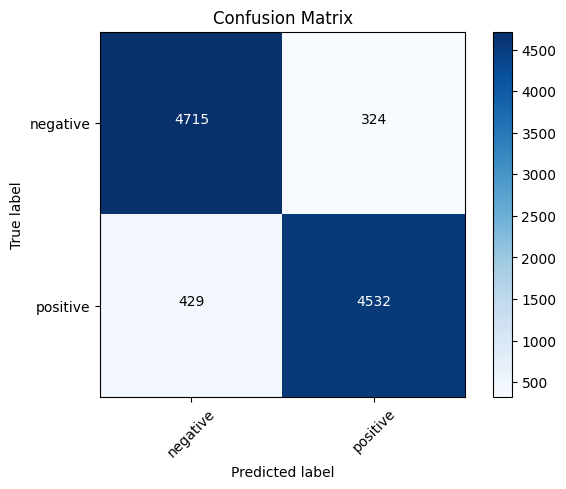

In [ ]:
import itertools
cm = confusion_matrix(y_true, y_pred)
print(cm)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

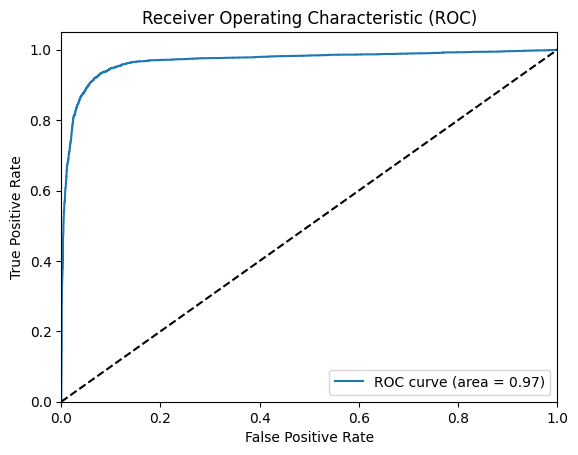

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])  # Use the probabilities of the positive class
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

LOGISTC REGRESION,TEST MODEL

In [61]:
from joblib import dump, load
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)
joblib.dump(logreg_model, 'logreg_model.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logreg_model.joblib']

In [62]:
loaded_model = load('logreg_model.joblib')


In [28]:
y_pred = loaded_model.predict(X_test_tfidf)
y_pred = loaded_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8884
